In [1]:
import fes
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import argparse
import pandas as pd
import xarray as xr

/home/angel/anaconda3/envs/fes/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [13]:
temp = 15 + 8 * np.random.randn(2, 2, 3)
precip = 10 * np.random.rand(2, 2, 3)

In [4]:
temp

array([[[14.76224355, 24.6894998 ,  8.7175422 ],
        [25.99370673, 13.36340327, 13.52912604]],

       [[ 7.20874536, 16.18557368, 20.78016876],
        [ 6.28661598,  9.9518429 ,  6.39330107]]])

In [6]:
np.size(temp)

12

In [12]:
temp[:,:,0]

array([[14.76224355, 25.99370673],
       [ 7.20874536,  6.28661598]])

In [14]:
lon = [[-99.83, -99.32], [-99.79, -99.23]]

In [15]:
lat = [[42.25, 42.21], [42.63, 42.59]]


In [24]:
ds = xr.Dataset({'temperature': (['x', 'y', 'time'],  temp),
   ....:                  'precipitation': (['x', 'y', 'time'], precip)},
   ....:                 coords={'lon': (['x', 'y'], lon),
   ....:                         'lat': (['x', 'y'], lat),
   ....:                         'time': pd.date_range('2014-09-06', periods=3),
   ....:                         'reference_time': pd.Timestamp('2014-09-05')})

In [22]:
pd.date_range('2014-09-06', periods=3)

DatetimeIndex(['2014-09-06', '2014-09-07', '2014-09-08'], dtype='datetime64[ns]', freq='D')

In [33]:
ff = []
init = float(0.9)
for m in range(0,10):
    print("We're on time %d" % (m))
    ff[:,m]= init + ( float(m) / 100 )

We're on time 0


TypeError: list indices must be integers or slices, not tuple

In [38]:
pd.date_range('2018-01-01', periods=90, freq='H'),

(DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
                '2018-01-01 02:00:00', '2018-01-01 03:00:00',
                '2018-01-01 04:00:00', '2018-01-01 05:00:00',
                '2018-01-01 06:00:00', '2018-01-01 07:00:00',
                '2018-01-01 08:00:00', '2018-01-01 09:00:00',
                '2018-01-01 10:00:00', '2018-01-01 11:00:00',
                '2018-01-01 12:00:00', '2018-01-01 13:00:00',
                '2018-01-01 14:00:00', '2018-01-01 15:00:00',
                '2018-01-01 16:00:00', '2018-01-01 17:00:00',
                '2018-01-01 18:00:00', '2018-01-01 19:00:00',
                '2018-01-01 20:00:00', '2018-01-01 21:00:00',
                '2018-01-01 22:00:00', '2018-01-01 23:00:00',
                '2018-01-02 00:00:00', '2018-01-02 01:00:00',
                '2018-01-02 02:00:00', '2018-01-02 03:00:00',
                '2018-01-02 04:00:00', '2018-01-02 05:00:00',
                '2018-01-02 06:00:00', '2018-01-02 07:00:00',
        

In [39]:
import numpy as np
from matplotlib import pyplot as plt

A = np.random.randint(1, 5, size=(100, 100)).astype(np.double)
y, x = np.ogrid[-50:50, -50:50]
mask = x**2 + y**2 <= 30**2
A[~mask] = 0

In [43]:
from scipy.spatial import cKDTree
# the indices of the non-zero locations and their corresponding values
nonzero_idx = np.vstack(np.where(mask)).T
nonzero_vals = A[mask]

# build a k-D tree
tree = cKDTree(nonzero_idx)

# use it to find the indices of all non-zero values that are at most 1 pixel
# away from each edge pixel
edge_idx = np.vstack(np.where(edges)).T
neighbours = tree.query_ball_point(edge_idx, r=1, p=np.inf)

# take the average value for each set of neighbours
new_vals = np.hstack(np.mean(nonzero_vals[n]) for n in neighbours)

# use these to replace the values of the edge pixels
A_new = A.astype(np.double, copy=True)
A_new[edges] = new_vals

NameError: name 'edges' is not defined

NameError: name 'edges' is not defined

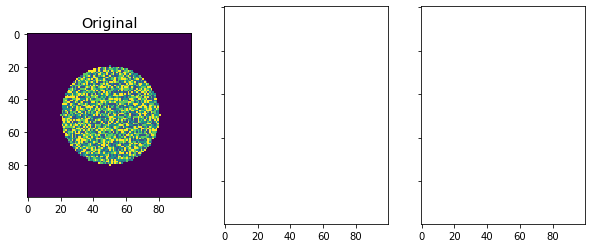

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4), sharex=True, sharey=True)
norm = plt.Normalize(0, A.max())
ax[0].imshow(A, norm=norm)
ax[0].set_title('Original', fontsize='x-large')
ax[1].imshow(edges)
ax[1].set_title('Edges', fontsize='x-large')
ax[2].imshow(A_new, norm=norm)
ax[2].set_title('Averaged', fontsize='x-large')
for aa in ax:
    aa.set_axis_off()
ax[0].set_xlim(20, 50)
ax[0].set_ylim(50, 80)
fig.tight_layout()
plt.show()